# Módulo 2 - Introducción a las historias periodísticas con datos
## El Plebiscito y la Consulta Liberal

<div class="naked-img">
    <img src="files/el_uniandino.png" width="500">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

# Vamos a descubrir qué le pasó a Alejandro en el 2013

3 voluntarios

Máximo 250 palabras

Todos pueden hacer preguntas

# Con datos o no, lo primero es la historia

### Noticia
* Responde qué, cómo, cuándo, quiénes.
* Está muy ligada a su temporalidad.
* No se interesa por profundizar en un fenómeno.

<div class="naked-img">
    <img src="files/crash.png" width="100">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

### Reportaje
* Aborda varias aristas de un fenómeno noticioso
* No pierde tan rápido su importancia en el tiempo,  
  aunque tenga temporalidad
* Lo que le interesa es la complejidad del fenómeno y 
  no solo los hechos


<div class="naked-img">
    <img src="files/cars_data.JPG" width="400">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

## La caja de herramientas del periodista

<div class="naked-img">
    <img src="files/toolbox.png" width="100">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

* Fuentes
* Documentos
* Datos

Fuentes:
    
Entre más fuentes mejor, el buen reportaje contrasta tantas como puede.

Busca involucrar varias orillas del fenómeno, así no sean contrarias, y no muchas de la misma perspectiva.

Se debe verificar (fact checking)


Documentos:
    
Fotografías, noticias, otros reportajes, etc.

Sirven de soporte para la información de las fuentes, para dar contexto (así sea solo para el periodista) y son fuentes de información.

Siempre hay que ir a la historia


## El esqueleto de la historia periodística

<div class="naked-img">
    <img src="files/esqueleto_historia.jpg" width="500">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

Tema:
Interés
Muy amplio
No es una historia


Ángulo:
Cómo van a abordar ese tema
No es una opinión ni una posición personal
Puede ir cambiando a lo largo de la investigación
A partir del ángulo se eligen las fuentes


Personajes:
Pueden ser un hilo conductor para el reportaje
Factor de interés
Fuentes balanceadas
No incluir fuentes innecesarias


Historia:
Se define a partir del tema y el ángulo
Se narra a través de personajes y datos
¿Cuál es tu historia en dos frases?



# La consulta liberal y el plebiscito - Parte 1 (asistido)

Contexto. Acá poner links a diferentes cubrimientos de las historias.

## ¿Qué preguntas quiero responder?

Esto es vital:

-Nos guía durante la búsqueda \
-Nos pone un objetivo que debemos buscar \
-Siempre empiecen por una pregunta periodística -> datos -> regresen y agreguen más preguntas

Entonces... 

¿Qué preguntas les interesa sobre este tema?

* 
* 

* ¿Cuáles fueron los municipios más importantes en ambas elecciones? ¿Y los departamentos?
* ¿Tenemos algún indicio de fraude?
* ¿Hubo algún comportamiento irregular?
* ¿Hay una relación entre el plebiscito y la consulta liberal?
* ¿Cómo votaron los municipios más pobres y los que tienen más violencia?
* En los municipios donde tienen más acceso a internet, ¿quién ganó? ¿Por qué?

## Fuentes de datos: ¿De dónde saco datos?

El equivalente a una primera búsqueda en Google en el periodismo de datos son los **datasets públicos**.

<div class="naked-img">
    <img src="files/dataset.png" width="100">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

Información fuentes oficiales o terceros que se puede acceder libremente.

Por ejemplo:
   * Otros medios de comunicación
   * [Instituciones](https://datos.gov.co) 
   * Google Datasets
   * Otros

<div class="naked-img">
    <img src="files/datos_abiertos.JPG" width="850">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

DANE, Registraduría, Fiscalía

## Data Wrangling 

Primero carguemos los datos

In [116]:
import pandas as pd
df_liberal = pd.read_csv("../periodismo_datos_101/data/liberal_plebi/consulta_liberal_cod.csv")

In [84]:
df_liberal.shape

(1123, 14)

In [85]:
df_liberal.head()

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun
0,1,ANTIOQUIA,1,MEDELLIN,"4,259","12,523","1,237",360,"18,379",antioquia_medellin,05_5001.0,100,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,-,10,antioquia_abriaqui,05_5004.0,100,5,5004
3,1,ANTIOQUIA,10,ALEJANDRIA,15,34,-,1,50,antioquia_alejandria,05_5021.0,100,5,5021
4,1,ANTIOQUIA,13,AMAGA,11,102,15,-,128,antioquia_amaga,05_5030.0,100,5,5030


Índice\
Nombre de las columnas\
Valores nulos reemplazados por guiones\
Marcadores de mil con comas\
Posibles llaves

In [86]:
df_liberal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cd                    1123 non-null   int64 
 1   departamento          1123 non-null   object
 2   cm                    1123 non-null   int64 
 3   municipio             1123 non-null   object
 4   juan_fernando_cristo  1123 non-null   object
 5   humberto_de_la_calle  1123 non-null   object
 6   votos_nulos           1123 non-null   object
 7   votos_no_marcados     1123 non-null   object
 8   total_votos           1123 non-null   object
 9   nom_dep_mun           1123 non-null   object
 10  cod_dep_mun           1123 non-null   object
 11  closeness             1123 non-null   int64 
 12  cod_dep               1123 non-null   int64 
 13  cod_mun               1123 non-null   int64 
dtypes: int64(5), object(9)
memory usage: 123.0+ KB


Hagamos las primeras transformaciones

In [87]:
# Reemplazar - por 0 o por Null
df_liberal.head()

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun
0,1,ANTIOQUIA,1,MEDELLIN,"4,259","12,523","1,237",360,"18,379",antioquia_medellin,05_5001.0,100,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,-,10,antioquia_abriaqui,05_5004.0,100,5,5004
3,1,ANTIOQUIA,10,ALEJANDRIA,15,34,-,1,50,antioquia_alejandria,05_5021.0,100,5,5021
4,1,ANTIOQUIA,13,AMAGA,11,102,15,-,128,antioquia_amaga,05_5030.0,100,5,5030


In [88]:
# Reemplazar - por 0 o por Null
df_liberal.iloc[2]['votos_nulos']

'  1 '

In [89]:
df_liberal["votos_nulos"] = df_liberal["votos_nulos"].apply(lambda x: x.strip())

In [90]:
for column in df_liberal.columns[4:9]:
    df_liberal[column] = df_liberal[column].apply(lambda x: int(x.strip().replace('-','0').replace(',','')))

In [91]:
df_liberal.head()

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun
0,1,ANTIOQUIA,1,MEDELLIN,4259,12523,1237,360,18379,antioquia_medellin,05_5001.0,100,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,0,10,antioquia_abriaqui,05_5004.0,100,5,5004
3,1,ANTIOQUIA,10,ALEJANDRIA,15,34,0,1,50,antioquia_alejandria,05_5021.0,100,5,5021
4,1,ANTIOQUIA,13,AMAGA,11,102,15,0,128,antioquia_amaga,05_5030.0,100,5,5030


In [92]:
df_liberal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cd                    1123 non-null   int64 
 1   departamento          1123 non-null   object
 2   cm                    1123 non-null   int64 
 3   municipio             1123 non-null   object
 4   juan_fernando_cristo  1123 non-null   int64 
 5   humberto_de_la_calle  1123 non-null   int64 
 6   votos_nulos           1123 non-null   int64 
 7   votos_no_marcados     1123 non-null   int64 
 8   total_votos           1123 non-null   int64 
 9   nom_dep_mun           1123 non-null   object
 10  cod_dep_mun           1123 non-null   object
 11  closeness             1123 non-null   int64 
 12  cod_dep               1123 non-null   int64 
 13  cod_mun               1123 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 123.0+ KB


## Breve receso de 5 minutos

## Exploratory Data Analysis (EDA)

In [11]:
df_liberal.head()

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun
0,1,ANTIOQUIA,1,MEDELLIN,4259,12523,1237,360,18379,antioquia_medellin,05_5001.0,100,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,0,10,antioquia_abriaqui,05_5004.0,100,5,5004
3,1,ANTIOQUIA,10,ALEJANDRIA,15,34,0,1,50,antioquia_alejandria,05_5021.0,100,5,5021
4,1,ANTIOQUIA,13,AMAGA,11,102,15,0,128,antioquia_amaga,05_5030.0,100,5,5030


In [12]:
df_liberal.describe()

,cd,cm,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,closeness,cod_dep,cod_mun
count,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000,1123.000000
mean,19.042743,111.634907,289.204809,325.608192,36.474622,11.687444,662.975067,96.647373,36.609083,37050.193232
std,14.403900,132.696322,1143.146400,1256.985333,149.834401,49.470902,2209.532263,14.633806,26.102455,26066.135354
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000
25%,7.000000,28.000000,18.000000,22.000000,3.000000,1.000000,72.000000,100.000000,15.000000,15515.000000
50%,16.000000,70.000000,70.000000,62.000000,8.000000,3.000000,189.000000,100.000000,25.000000,25736.000000
75%,27.000000,150.000000,242.000000,194.500000,20.000000,8.000000,487.500000,100.000000,63.000000,63160.000000
max,72.000000,900.000000,26049.000000,24882.000000,3244.000000,714.000000,38073.000000,100.000000,99.000000,99773.000000


### Funciones útiles y rápidas
* value_counts()
* max()/min()/mean()
* unique()/drop_duplicates()


In [29]:
df_liberal.departamento

0       ANTIOQUIA
1       ANTIOQUIA
2       ANTIOQUIA
3       ANTIOQUIA
4       ANTIOQUIA
          ...    
1118       VAUPES
1119      VICHADA
1120      VICHADA
1121      VICHADA
1122      VICHADA
Name: departamento, Length: 1123, dtype: object

### import seaborn as sns
* Scatterplot
* Distplot/Histplot/Barplot/Boxplot
* Joinplot/Pairplot
* Corrheatmap

Librería pensada específicamente para hacer análisis estadísticos

Desarrollada encima de matplotlib

Pensada para integrarse muy bien con Pandas

In [31]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


* [Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)


* [Displot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

* [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

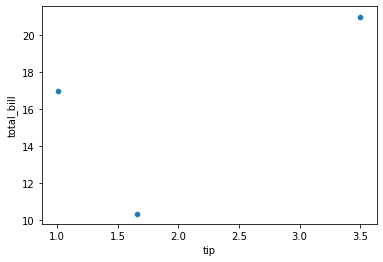

In [33]:
sns.scatterplot(x='tip', y='total_bill',data=tips.head(3))

In [58]:
df_liberal.head(3)

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun
0,1,ANTIOQUIA,1,MEDELLIN,4259,12523,1237,360,18379,antioquia_medellin,05_5001.0,100,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,0,10,antioquia_abriaqui,05_5004.0,100,5,5004


In [ ]:
sns.scatterplot(data=df_liberal,
                x='',
                y='')

Text(0, 0.5, 'votos_candidato')

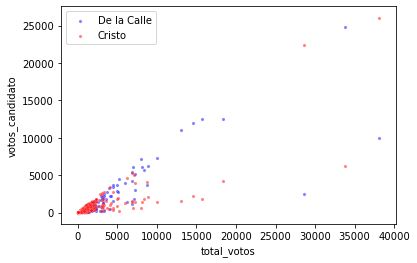

In [40]:
#resp_scatter
import matplotlib.pyplot as plt

sns.scatterplot(data=df_liberal, 
                x="total_votos", 
                y="humberto_de_la_calle",
                s=10,
                alpha=0.5, 
                color='blue',
                label='De la Calle')
sns.scatterplot(data=df_liberal, 
                x="total_votos", 
                y="juan_fernando_cristo",
                s=10,
                alpha=0.5, 
                color='red',
                label='Cristo')
plt.legend()
plt.ylabel('votos_candidato')

### Retomemos las preguntas...

* ¿Cuáles fueron los departamentos más importantes en ambas elecciones? ¿Y los municipios?

Veamos [lo que dijo](https://lasillavacia.com/cinco-conclusiones-de-la-consulta-liberal-63522) La Silla Vacía: 

<div class="naked-img">
    <img src="files/liberal_la_silla.JPG" width="900">
</div>
<script>
    $("naked-img").css("margin-left", "15%");
</script>

### Vamos a reconstruir sus pasos

In [59]:
temp = pd.pivot_table(index='departamento', 
                      aggfunc={'juan_fernando_cristo':'sum', 'humberto_de_la_calle':'sum','total_votos':'sum'}, 
                      data=df_liberal).reset_index()

In [63]:
temp.sort_values(by='total_votos',ascending=False).head(5)

,departamento,humberto_de_la_calle,juan_fernando_cristo,total_votos
4,BOGOTA D.C.,75144,16021,100106
1,ANTIOQUIA,38818,31633,75893
30,VALLE,47458,21202,74631
3,ATLANTICO,29084,38997,71093
22,NORTE DE SANTANDER,3798,39002,48111


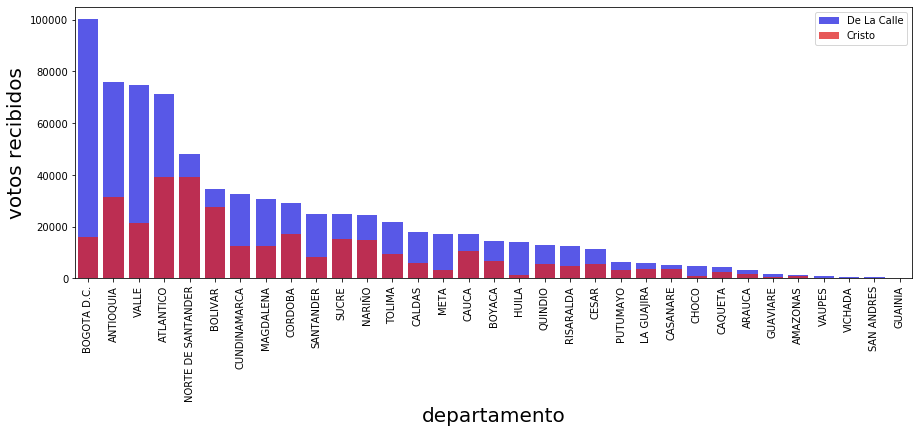

In [55]:
#plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.barplot(x='departamento',
            y='total_votos',
            data=temp.sort_values(by='total_votos',
                                  ascending=False),
            color='blue',
            label='De La Calle',
            alpha=0.75,
            ax=ax)

ax.tick_params(axis='x',
               labelrotation=90)

sns.barplot(x='departamento',
            y='juan_fernando_cristo',
            data=temp.sort_values(by='total_votos',
                                  ascending=False),
            color='red',
            label='Cristo',
            alpha=0.75,
            ax=ax)
ax.set_ylabel('votos recibidos',fontsize=20)
ax.set_xlabel('departamento',fontsize=20)
ax.legend()
#ax1.tick_params(axis='x',labelrotation=90)

### ¿Alguien vio el error?

In [64]:
temp['dif_abs'] = temp.humberto_de_la_calle - temp.juan_fernando_cristo

In [65]:
temp.sort_values(by='dif_abs',ascending=False).head()

,departamento,humberto_de_la_calle,juan_fernando_cristo,total_votos,dif_abs
4,BOGOTA D.C.,75144,16021,100106,59123
30,VALLE,47458,21202,74631,26256
17,HUILA,11481,1228,13949,10253
20,META,12005,3340,17272,8665
1,ANTIOQUIA,38818,31633,75893,7185


In [66]:
temp.sort_values(by='dif_abs',ascending=False).tail()

,departamento,humberto_de_la_calle,juan_fernando_cristo,total_votos,dif_abs
21,NARIÑO,8255,14801,24293,-6546
28,SUCRE,8582,15341,24799,-6759
3,ATLANTICO,29084,38997,71093,-9913
5,BOLIVAR,5876,27639,34706,-21763
22,NORTE DE SANTANDER,3798,39002,48111,-35204


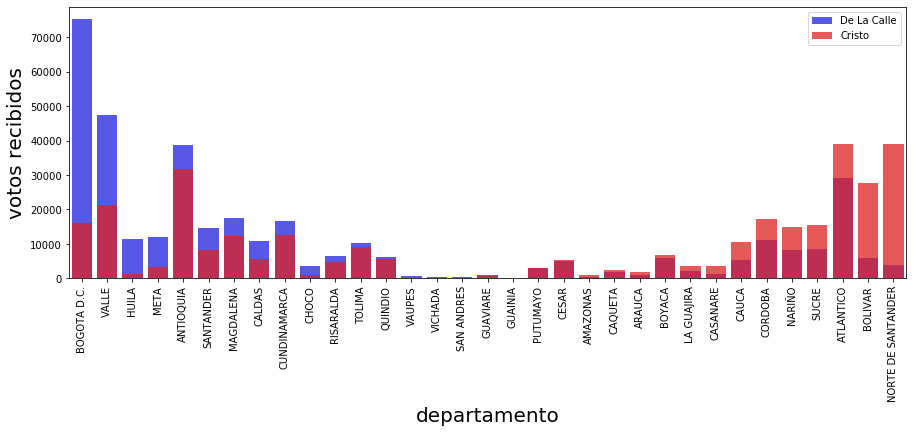

In [80]:
#plot_difs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.barplot(x='departamento',
            y='humberto_de_la_calle',
            data=temp.sort_values(by='dif_abs',
                                  ascending=False),
            color='blue',
            label='De La Calle',
            alpha=0.75,
            ax=ax)

ax.tick_params(axis='x',
               labelrotation=90)

sns.barplot(x='departamento',
            y='juan_fernando_cristo',
            data=temp.sort_values(by='dif_abs',
                                  ascending=False),
            color='red',
            label='Cristo',
            alpha=0.75,
            ax=ax)
ax.set_ylabel('votos recibidos',fontsize=20)
ax.set_xlabel('departamento',fontsize=20)
ax.legend()
#ax1.tick_params(axis='x',labelrotation=90)

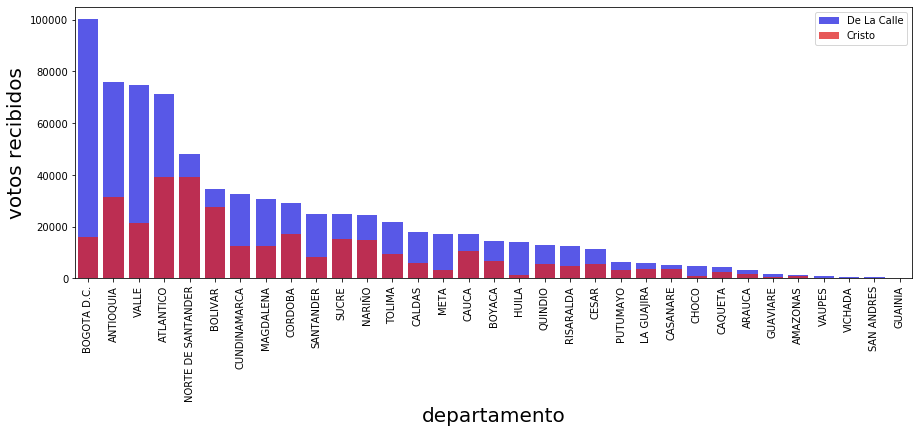

In [71]:
#plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.barplot(x='departamento',
            y='total_votos',
            data=temp.sort_values(by='total_votos',
                                  ascending=False),
            color='blue',
            label='De La Calle',
            alpha=0.75,
            ax=ax)

ax.tick_params(axis='x',
               labelrotation=90)

sns.barplot(x='departamento',
            y='juan_fernando_cristo',
            data=temp.sort_values(by='total_votos',
                                  ascending=False),
            color='red',
            label='Cristo',
            alpha=0.75,
            ax=ax)
ax.set_ylabel('votos recibidos',fontsize=20)
ax.set_xlabel('departamento',fontsize=20)
ax.legend()
#ax1.tick_params(axis='x',labelrotation=90)

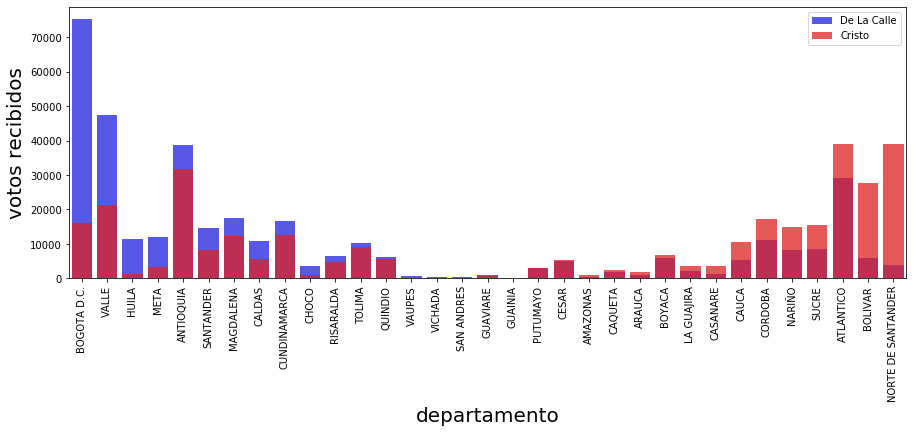

In [56]:
#plot_difs
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = plt.subplot(1,1,1)
sns.barplot(x='departamento',
            y='humberto_de_la_calle',
            data=temp.sort_values(by='dif_abs',
                                  ascending=False),
            color='blue',
            label='De La Calle',
            alpha=0.75,
            ax=ax)

ax.tick_params(axis='x',
               labelrotation=90)

sns.barplot(x='departamento',
            y='juan_fernando_cristo',
            data=temp.sort_values(by='dif_abs',
                                  ascending=False),
            color='red',
            label='Cristo',
            alpha=0.75,
            ax=ax)
ax.set_ylabel('votos recibidos',fontsize=20)
ax.set_xlabel('departamento',fontsize=20)
ax.legend()
#ax1.tick_params(axis='x',labelrotation=90)

### ¿Cómo resolverían la pregunta de los municipios?

In [72]:
temp_mun = pd.pivot_table(index=['departamento','municipio'], 
                          aggfunc={'juan_fernando_cristo':'sum', 'humberto_de_la_calle':'sum','total_votos':'sum'}, 
                          data=df_liberal).reset_index()

In [75]:
temp_mun.sort_values(by='total_votos',ascending=False)

,departamento,municipio,humberto_de_la_calle,juan_fernando_cristo,total_votos
135,ATLANTICO,BARRANQUILLA,9935,26049,38073
1083,VALLE,CALI,24882,6206,33819
842,NORTE DE SANTANDER,CUCUTA,2445,22469,28624
70,ANTIOQUIA,MEDELLIN,12523,4259,18379
173,BOGOTA D.C.,SUBA,12525,1815,15689
...,...,...,...,...,...
266,BOYACA,GUICAN,0,3,4
233,BOYACA,BRICEÑO,1,2,3
599,CUNDINAMARCA,NIMAIMA,2,0,2
251,BOYACA,COVARACHIA,1,0,1


In [76]:
temp_mun['dif_abs'] = temp_mun.humberto_de_la_calle - temp_mun.juan_fernando_cristo

In [78]:
temp_mun.sort_values(by='dif_abs',ascending=False).head()

,departamento,municipio,humberto_de_la_calle,juan_fernando_cristo,total_votos,dif_abs
1083,VALLE,CALI,24882,6206,33819,18676
173,BOGOTA D.C.,SUBA,12525,1815,15689,10710
735,MAGDALENA,SANTA MARTA,11926,2213,14585,9713
177,BOGOTA D.C.,USAQUEN,11094,1574,13053,9520
70,ANTIOQUIA,MEDELLIN,12523,4259,18379,8264


In [79]:
temp_mun.sort_values(by='dif_abs',ascending=False).tail()

,departamento,municipio,humberto_de_la_calle,juan_fernando_cristo,total_votos,dif_abs
1023,SUCRE,SINCELEJO,1774,5015,7132,-3241
520,CORDOBA,MONTERIA,1371,4612,6206,-3241
1114,VALLE,YUMBO,1202,5297,6897,-4095
135,ATLANTICO,BARRANQUILLA,9935,26049,38073,-16114
842,NORTE DE SANTANDER,CUCUTA,2445,22469,28624,-20024


In [93]:
df_plebi = pd.read_csv("../periodismo_datos_101/data/liberal_plebi/scrape_plebiscito_cod.csv")

In [95]:
df_plebi.head()

,municipio,link,departamento,votos_si,votos_no,votos_validos,votos_no_marcados,votos_nulos,votos_totales,votos_habilitados,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun
0,EL ENCANTO,../99PL/DPL60010ZZZZZZZZZZZZ_L1.htm,AMAZONAS,170,51,221,0,2,223,743,amazonas_el encanto,91_91263.0,100,91,91263
1,LA CHORRERA,../99PL/DPL60013ZZZZZZZZZZZZ_L1.htm,AMAZONAS,300,62,362,1,3,366,1030,amazonas_la chorrera,91_91405.0,100,91,91405
2,LA PEDRERA,../99PL/DPL60016ZZZZZZZZZZZZ_L1.htm,AMAZONAS,189,25,214,1,1,216,1008,amazonas_la pedrera,91_91407.0,100,91,91407
3,LA VICTORIA,../99PL/DPL60017ZZZZZZZZZZZZ_L1.htm,AMAZONAS,4,1,5,0,0,5,18,amazonas_la victoria,91_91430.0,100,91,91430
4,LETICIA,../99PL/DPL60001ZZZZZZZZZZZZ_L1.htm,AMAZONAS,4403,4463,8866,40,84,8990,34592,amazonas_leticia,91_91001.0,100,91,91001


In [97]:
df_liberal.head()

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun
0,1,ANTIOQUIA,1,MEDELLIN,4259,12523,1237,360,18379,antioquia_medellin,05_5001.0,100,5,5001
1,1,ANTIOQUIA,4,ABEJORRAL,21,280,10,5,316,antioquia_abejorral,05_5002.0,100,5,5002
2,1,ANTIOQUIA,7,ABRIAQUI,2,7,1,0,10,antioquia_abriaqui,05_5004.0,100,5,5004
3,1,ANTIOQUIA,10,ALEJANDRIA,15,34,0,1,50,antioquia_alejandria,05_5021.0,100,5,5021
4,1,ANTIOQUIA,13,AMAGA,11,102,15,0,128,antioquia_amaga,05_5030.0,100,5,5030


In [102]:
debug = df_plebi.merge(df_liberal, how='left', on=['cod_dep','cod_mun'])

In [103]:
debug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 0 to 1185
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   municipio_x           1186 non-null   object 
 1   link                  1186 non-null   object 
 2   departamento_x        1186 non-null   object 
 3   votos_si              1186 non-null   int64  
 4   votos_no              1186 non-null   int64  
 5   votos_validos         1186 non-null   int64  
 6   votos_no_marcados_x   1186 non-null   int64  
 7   votos_nulos_x         1186 non-null   int64  
 8   votos_totales         1186 non-null   int64  
 9   votos_habilitados     1186 non-null   int64  
 10  nom_dep_mun_x         1186 non-null   object 
 11  cod_dep_mun_x         1186 non-null   object 
 12  closeness_x           1186 non-null   int64  
 13  cod_dep               1186 non-null   int64  
 14  cod_mun               1186 non-null   int64  
 15  cd                   

In [106]:
pd.set_option('display.max_columns', None)

In [107]:
debug[(debug.departamento_y.isnull())&(debug.departamento_x!='CONSULADOS')]

,municipio_x,link,departamento_x,votos_si,votos_no,votos_validos,votos_no_marcados_x,votos_nulos_x,votos_totales,votos_habilitados,nom_dep_mun_x,cod_dep_mun_x,closeness_x,cod_dep,cod_mun,cd,departamento_y,cm,municipio_y,juan_fernando_cristo,humberto_de_la_calle,votos_nulos_y,votos_no_marcados_y,total_votos,nom_dep_mun_y,cod_dep_mun_y,closeness_y
0,EL ENCANTO,../99PL/DPL60010ZZZZZZZZZZZZ_L1.htm,AMAZONAS,170,51,221,0,2,223,743,amazonas_el encanto,91_91263.0,100,91,91263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LA CHORRERA,../99PL/DPL60013ZZZZZZZZZZZZ_L1.htm,AMAZONAS,300,62,362,1,3,366,1030,amazonas_la chorrera,91_91405.0,100,91,91405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LA PEDRERA,../99PL/DPL60016ZZZZZZZZZZZZ_L1.htm,AMAZONAS,189,25,214,1,1,216,1008,amazonas_la pedrera,91_91407.0,100,91,91407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LA VICTORIA,../99PL/DPL60017ZZZZZZZZZZZZ_L1.htm,AMAZONAS,4,1,5,0,0,5,18,amazonas_la victoria,91_91430.0,100,91,91430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MIRITI PARANA,../99PL/DPL60019ZZZZZZZZZZZZ_L1.htm,AMAZONAS,89,7,96,0,0,96,477,amazonas_miriti parana,91_91460.0,96,91,91460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,PUERTO ALEGRIA,../99PL/DPL60030ZZZZZZZZZZZZ_L1.htm,AMAZONAS,52,5,57,1,1,59,259,amazonas_puerto alegria,91_91530.0,100,91,91530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PUERTO ARICA,../99PL/DPL60040ZZZZZZZZZZZZ_L1.htm,AMAZONAS,97,22,119,0,0,119,405,amazonas_puerto arica,91_91536.0,100,91,91536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,PUERTO SANTANDER,../99PL/DPL60021ZZZZZZZZZZZZ_L1.htm,AMAZONAS,125,16,141,0,2,143,642,amazonas_puerto santander,91_91669.0,100,91,91669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,TARAPACA,../99PL/DPL60022ZZZZZZZZZZZZ_L1.htm,AMAZONAS,265,68,333,7,4,344,1304,amazonas_tarapaca,91_91798.0,100,91,91798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,BARRANCO MINAS,../99PL/DPL50070ZZZZZZZZZZZZ_L1.htm,GUAINIA,298,67,365,2,5,372,1986,guainia_barranco minas,94_94343.0,98,94,94343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
df_liberal[df_liberal.cod_dep==94]

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun,cod_dep1,cod_mun1
1065,50,GUAINIA,1,INIRIDA,55,63,11,2,131,guainia_inirida,94_94001.0,100,94,94001,94,94001


In [113]:
debg = df_liberal.copy()

In [114]:
debg['cod_dep1']=debg.cod_dep_mun.apply(lambda x: int(x.split('_')[0]))

In [115]:
debg[debg.cod_dep1!=debg.cod_dep]

,cd,departamento,cm,municipio,juan_fernando_cristo,humberto_de_la_calle,votos_nulos,votos_no_marcados,total_votos,nom_dep_mun,cod_dep_mun,closeness,cod_dep,cod_mun,cod_dep1
699,23,NARIÑO,52,GUACHUCAL,36,82,8,2,128,narino_guachucal,52_52317.0,100,94,94886,52


# La consulta liberal y el plebiscito - Parte 2 (autónomo)